In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
sys.path.append("..")
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from src.unet_models import MODELS
from src.tools import data_merger

In [3]:
train_x = data_merger(dataset_type='train', data_type='src', noise_type='all', dirs = ['noise_7e-3'])
train_y = data_merger(dataset_type='train', data_type='label', noise_type='all', dirs = ['noise_7e-3'])

In [4]:
print(train_x.shape, train_y.shape)

(2700, 32, 32) (2700, 32, 32)


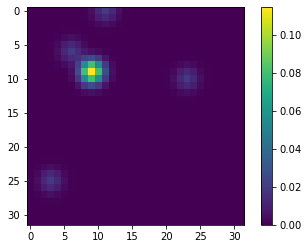

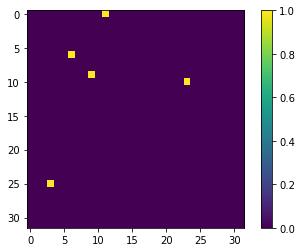

In [5]:
samp = np.random.randint(4,train_x.shape[0],1)[0]
plt.figure()
plt.imshow(train_x[samp])
plt.colorbar()

plt.figure()
plt.imshow(train_y[samp])
plt.colorbar()

In [10]:
bins = 32
channel = 1
loss_func = 'mse'
lr = '1e-4'
opt = tf.keras.optimizers.Nadam(learning_rate=float(lr))
metric = 'mae'
reg = '0'
filt_lst = [8,16,32,64]
dns = 256
drop = '0'
batch_size = 256#
ep=500

In [11]:
get_model = MODELS()
model_type="Unet16"

if model_type=="attention_resunet":
    FILTER_NUM = 16
    FILTER_SIZE = 3
    NUM_CLASSES = 1
    dropout_rate = 0.2
    batch_norm = False
    model = get_model.Attention_ResUNet(bins,channel,loss_func,opt,metric,FILTER_NUM=FILTER_NUM,batch_norm = False, dropout_rate = float(drop))
elif model_type=="unetpp":
    nb_filter = [1, 32, 64, 128, 256]
    deep_supervision = False
    model = get_model.Nest_Net(bins,channel,loss_func,opt,metric,nb_filter=nb_filter,deep_supervision=deep_supervision)
elif model_type=="Unet16":
    filt_num = 16
    model = get_model.UNET(bins, channel, loss_func, opt, metric, float(reg), filt_num)
elif model_type=="vgg16":
    model = get_model.VGG16(filt_lst,dns,bins,channel,loss_func,opt,metric)
elif model_type=="resUnet":
    model = get_model.resUnet(bins, channel, loss_func, opt, metric, float(reg))
elif model_type=="unetPP48163264":
    nb_filter = [4,8,16,32,64]
    filters = [4,8,16,32,64]
    model = get_model.unetPP(bins,channel,loss_func,opt,metric,float(reg), nb_filter, filters)

folder_name = 'noise_7e-3'
chnl = 'ch0'
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint(f'../models/{folder_name}/{model_type}_{folder_name}_{loss_func}_lr_{lr}_{ep}_DROPOUT{reg}.h5',
                                       monitor='val_loss', model='min', verbose=1, save_best_only=True)


history=model.fit(train_x[:],train_y[:],
                batch_size=batch_size,epochs=ep,
                validation_split=0.33,shuffle=True, callbacks=[callback,mc])

layer output: (None, 32, 32, 1)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d_57 (Conv2D)             (None, 32, 32, 16)   160         ['input_4[0][0]']                
                                                                                                  
 conv2d_58 (Conv2D)             (None, 32, 32, 16)   2320        ['conv2d_57[0][0]']              
                                                                                                  
 max_pooling2d_15 (MaxPooling2D  (None, 16, 16, 16)  0           ['conv2d_58[0][0]']              
 )                                                          

8/8 [==============================] - ETA: 0s - loss: 0.0142 - mae: 0.0185
Epoch 1: val_loss improved from inf to 0.01435, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_500_DROPOUT0.h5
8/8 [==============================] - 7s 293ms/step - loss: 0.0142 - mae: 0.0185 - val_loss: 0.0144 - val_mae: 0.0308
Epoch 2/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0140 - mae: 0.0232
Epoch 2: val_loss did not improve from 0.01435
8/8 [==============================] - 0s 46ms/step - loss: 0.0140 - mae: 0.0232 - val_loss: 0.0144 - val_mae: 0.0395
Epoch 3/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0138 - mae: 0.0260
Epoch 3: val_loss did not improve from 0.01435
8/8 [==============================] - 0s 43ms/step - loss: 0.0138 - mae: 0.0260 - val_loss: 0.0144 - val_mae: 0.0439
Epoch 4/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0136 - mae: 0.0266
Epoch 4: val_loss improved from 0.01435 to 0.01432, saving model to ../models/no

8/8 [==============================] - ETA: 0s - loss: 0.0097 - mae: 0.0191
Epoch 29: val_loss did not improve from 0.01227
8/8 [==============================] - 0s 48ms/step - loss: 0.0097 - mae: 0.0191 - val_loss: 0.0127 - val_mae: 0.0266
Epoch 30/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0096 - mae: 0.0188
Epoch 30: val_loss did not improve from 0.01227
8/8 [==============================] - 0s 44ms/step - loss: 0.0096 - mae: 0.0188 - val_loss: 0.0126 - val_mae: 0.0257
Epoch 31/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0095 - mae: 0.0185
Epoch 31: val_loss did not improve from 0.01227
8/8 [==============================] - 0s 44ms/step - loss: 0.0095 - mae: 0.0185 - val_loss: 0.0128 - val_mae: 0.0282
Epoch 32/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0094 - mae: 0.0184
Epoch 32: val_loss improved from 0.01227 to 0.01213, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_500_DROPOUT0.h5
8/8 [==================

Epoch 61/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0072 - mae: 0.0138
Epoch 61: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 44ms/step - loss: 0.0072 - mae: 0.0138 - val_loss: 0.0135 - val_mae: 0.0240
Epoch 62/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0072 - mae: 0.0136
Epoch 62: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 46ms/step - loss: 0.0072 - mae: 0.0136 - val_loss: 0.0133 - val_mae: 0.0232
Epoch 63/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0071 - mae: 0.0135
Epoch 63: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 44ms/step - loss: 0.0071 - mae: 0.0135 - val_loss: 0.0142 - val_mae: 0.0269
Epoch 64/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0070 - mae: 0.0135
Epoch 64: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 44ms/step - loss: 0.0070 - mae: 0.0135 - val_loss: 0.013

7/8 [=========================>....] - ETA: 0s - loss: 0.0058 - mae: 0.0113
Epoch 93: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 44ms/step - loss: 0.0058 - mae: 0.0113 - val_loss: 0.0214 - val_mae: 0.0389
Epoch 94/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0058 - mae: 0.0113
Epoch 94: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 46ms/step - loss: 0.0057 - mae: 0.0113 - val_loss: 0.0189 - val_mae: 0.0336
Epoch 95/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0057 - mae: 0.0111
Epoch 95: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 45ms/step - loss: 0.0057 - mae: 0.0111 - val_loss: 0.0214 - val_mae: 0.0386
Epoch 96/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0057 - mae: 0.0113
Epoch 96: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 46ms/step - loss: 0.0057 - mae: 0.0113 - val_loss: 0.0254 - val_mae: 

Epoch 125/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0048 - mae: 0.0096
Epoch 125: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 45ms/step - loss: 0.0048 - mae: 0.0096 - val_loss: 0.0331 - val_mae: 0.0533
Epoch 126/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0049 - mae: 0.0097
Epoch 126: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 50ms/step - loss: 0.0048 - mae: 0.0097 - val_loss: 0.0259 - val_mae: 0.0413
Epoch 127/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0047 - mae: 0.0092
Epoch 127: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 45ms/step - loss: 0.0047 - mae: 0.0092 - val_loss: 0.0318 - val_mae: 0.0493
Epoch 128/500
7/8 [=========================>....] - ETA: 0s - loss: 0.0047 - mae: 0.0093
Epoch 128: val_loss did not improve from 0.01213
8/8 [==============================] - 0s 45ms/step - loss: 0.0047 - mae: 0.0094 - val_los

KeyboardInterrupt: 

In [6]:
train_X = train_x.reshape(train_x.shape[0],32,32,1)#/np.max(train_x)
train_Y = train_y.reshape(train_y.shape[0],32,32,1)

In [ ]:
batch_size = 64
epochs = 2500
history = model.fit(train_X, train_Y,
          batch_size=batch_size,
          epochs=epochs,
          #validation_split=.33,
          validation_split = 0.33,          
          verbose=1,
          callbacks=[callback, mc])

Epoch 1/2500
32/32 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0068
Epoch 1: val_loss did not improve from 0.01549
32/32 [==============================] - 6s 81ms/step - loss: 0.0038 - mae: 0.0068 - val_loss: 0.0159 - val_mae: 0.0218
Epoch 2/2500
32/32 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0065
Epoch 2: val_loss did not improve from 0.01549
32/32 [==============================] - 1s 21ms/step - loss: 0.0037 - mae: 0.0065 - val_loss: 0.0161 - val_mae: 0.0213
Epoch 3/2500
29/32 [==========================>...] - ETA: 0s - loss: 0.0035 - mae: 0.0063
Epoch 3: val_loss did not improve from 0.01549
32/32 [==============================] - 1s 23ms/step - loss: 0.0035 - mae: 0.0063 - val_loss: 0.0161 - val_mae: 0.0220
Epoch 4/2500
31/32 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0061
Epoch 4: val_loss did not improve from 0.01549
32/32 [==============================] - 1s 24ms/step - loss: 0.0034 - mae: 0.0061 - val